In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
X_all = pd.read_pickle("X_all.pkl")
Y_all = pd.read_pickle("Y_all.pkl")

In [3]:
X_all = np.asarray(X_all)
Y_all = np.asarray(Y_all)

In [4]:
with open('samples_classifications.pickle', 'rb') as handle:
    samples_classifications = pickle.load(handle)

<h3>Classifier comparison exploiting PCA</h3>

In [12]:
Y = ['HEALTHY' if Y_all[i]==1 else 'COVID-19' for i in range(0, 3917)]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_all)
import plotly.express as px

fig = px.scatter(pca_result, x=0, y=1, color=Y,  color_discrete_sequence=['blue', 'red'])
fig.show()

In [14]:
Y_knn = ['HEALTHY' if samples_classifications[i]['KNN']==1 else 'COVID-19' for i in range(0, 3917)]
Y_et = ['HEALTHY' if samples_classifications[i]['ET']==1 else 'COVID-19' for i in range(0, 3917)]
Y_rf = ['HEALTHY' if samples_classifications[i]['RF']==1 else 'COVID-19'  for i in range(0, 3917)]
Y_svc = ['HEALTHY' if samples_classifications[i]['SVC']==1 else 'COVID-19'  for i in range(0, 3917)]
Y_lgbm = ['HEALTHY' if samples_classifications[i]['LGBM']==1 else 'COVID-19'  for i in range(0, 3917)]

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_all)
import plotly.express as px

fig = px.scatter(pca_result, x=0, y=1, color=Y_knn, color_discrete_sequence=['blue', 'red'])
fig.show()

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_all)
import plotly.express as px

fig = px.scatter(pca_result, x=0, y=1, color=Y_et)
fig.show()

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_all)
import plotly.express as px

fig = px.scatter(pca_result, x=0, y=1, color=Y_rf)
fig.show()

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_all)
import plotly.express as px

fig = px.scatter(pca_result, x=0, y=1, color=Y_svc)
fig.show()

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_all)
import plotly.express as px

fig = px.scatter(pca_result, x=0, y=1, color=Y_lgbm)
fig.show()

<h3> Comparison using similarity</h3>

In [5]:
# combinations with 2 classifier and compute the % of similiraty (how samples they classify as the same)

In [6]:
Y_knn = ['HEALTHY' if samples_classifications[i]['KNN']==1 else 'COVID-19' for i in range(0, 3917)]
Y_et = ['HEALTHY' if samples_classifications[i]['ET']==1 else 'COVID-19' for i in range(0, 3917)]
Y_rf = ['HEALTHY' if samples_classifications[i]['RF']==1 else 'COVID-19'  for i in range(0, 3917)]
Y_svc = ['HEALTHY' if samples_classifications[i]['SVC']==1 else 'COVID-19'  for i in range(0, 3917)]
Y_lgbm = ['HEALTHY' if samples_classifications[i]['LGBM']==1 else 'COVID-19'  for i in range(0, 3917)]
Y_ann = ['HEALTHY' if samples_classifications[i]['ANN']==1 else 'COVID-19'  for i in range(0, 3917)]

In [7]:
classifiers = ['KNN', 'ET', 'RF', 'SVC', 'LGBM', 'ANN']
similarity = {}

for x in classifiers:
    for y in classifiers:
        if x+'_'+y not in similarity and y+'_'+x not in similarity and x!=y:
            sim = 0
            for i in range(0, 3917):
                if samples_classifications[i][x] == samples_classifications[i][y]:
                    sim+=1
            similarity[x+'_'+y] = (sim, sim/3917)

In [8]:
pd.DataFrame(similarity)

KNN_ET       KNN_RF      KNN_SVC     KNN_LGBM     KNN_ANN  \
0  2787.000000  2781.000000  2882.000000  2795.000000  2537.00000   
1     0.711514     0.709982     0.735767     0.713556     0.64769   

         ET_RF       ET_SVC      ET_LGBM       ET_ANN       RF_SVC  \
0  3287.000000  2830.000000  3011.000000  2769.000000  2848.000000   
1     0.839163     0.722492     0.768701     0.706919     0.727087   

       RF_LGBM       RF_ANN     SVC_LGBM      SVC_ANN     LGBM_ANN  
0  3125.000000  2751.000000  2850.000000  2896.000000  2757.000000  
1     0.797804     0.702323     0.727598     0.739341     0.703855

In [14]:
classifiers = ['KNN', 'ET', 'RF', 'SVC', 'LGBM', 'ANN']
matrice = []

for index_x,x in enumerate(classifiers):
    matrice_x_y = []
    for index_y,y in enumerate(classifiers):
        sim = 0
        for i in range(0, 3917):
            if samples_classifications[i][x] == samples_classifications[i][y]:
                sim+=1
        matrice_x_y.append(sim)
    matrice.append(matrice_x_y)    

You should consider upgrading via the 'c:\users\vince\anaconda3\python.exe -m pip install --upgrade pip' command.


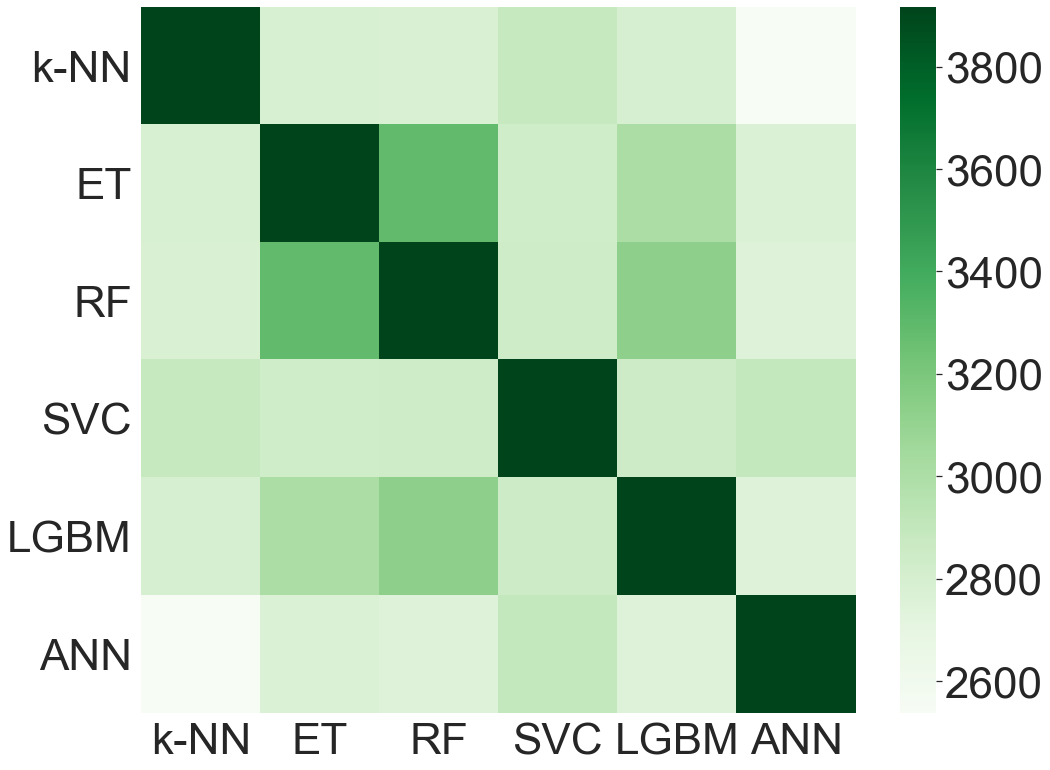

In [19]:
!pip install seaborn
import seaborn as sn
import matplotlib.pyplot as plt
labels = ['k-NN', 'ET', 'RF', 'SVC', 'LGBM', 'ANN']

plt.figure(figsize=(16,13))
sn.set(font_scale=4)
sn.heatmap(matrice, cmap= 'Greens', xticklabels=[x for x in labels], yticklabels=[x for x in labels])
plt.savefig('heat.png', dpi=600)

In [10]:
for i,x in enumerate(matrice):
    print(classifiers[i], (sum(x)-3917)/(3917*5))

KNN 0.7037018126116926
ET 0.7497574674495787
RF 0.7552718917538933
SVC 0.7304569823844779
LGBM 0.7423027827418943
ANN 0.7000255297421496
